In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Task1

In [12]:
data = np.load('data2.npz')

In [15]:
np.array(data)

array(['x1', 'y1', 'x4', 'y4', 'x5', 'y5'], dtype='<U2')

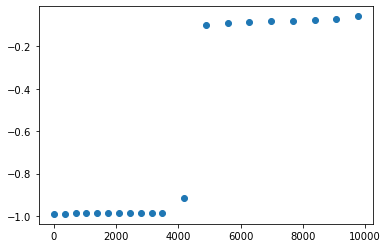

In [22]:
x1 = data['x1']
y1 = data['y1']
plt.scatter(x1, y1)
plt.show()

Построим интерполяционный многочлен лагранжа

In [19]:
def simpl_lagrange(x, xt, i):
    ans = 1
    for c in np.delete(xt, i):
        ans *= (x - c)/(xt[i] - c)
    return ans

In [20]:
def lagrange(x, xt, yt):
    summ = 0
    for i in range(len(yt)):
        summ += yt[i]*simpl_lagrange(x, xt, i)
    return summ

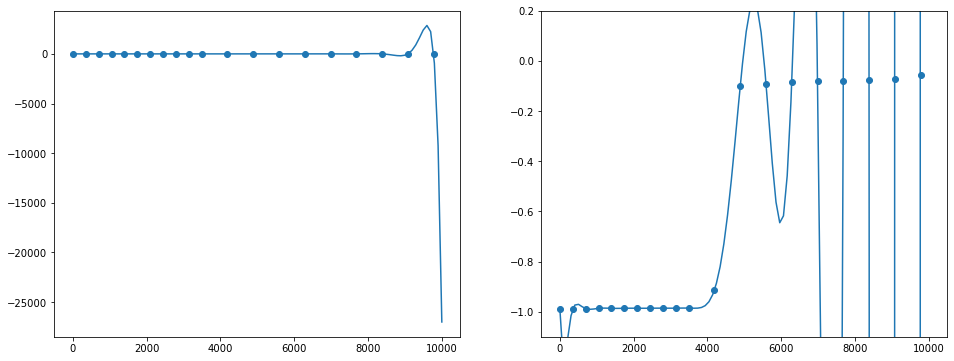

In [39]:
plt.figure(figsize=(16, 6))
plt.tight_layout()

plt.subplot(1, 2, 1)
plt.scatter(x1, y1)
xx = np.linspace(0, 10**4, 100)
plt.plot(xx, lagrange(xx, x1, y1))

plt.subplot(1, 2, 2)
plt.scatter(x1, y1)
xx = np.linspace(0, 10**4, 100)
plt.plot(xx, lagrange(xx, x1, y1))
plt.ylim(-1.1, 0.2)
plt.show()

Видно, что это совсем не то, что мы хотим получить

In [47]:
from scipy.interpolate import CubicSpline, PchipInterpolator

In [48]:
inter_cub = CubicSpline(x1, y1)
inter_pchip = PchipInterpolator(x1, y1)

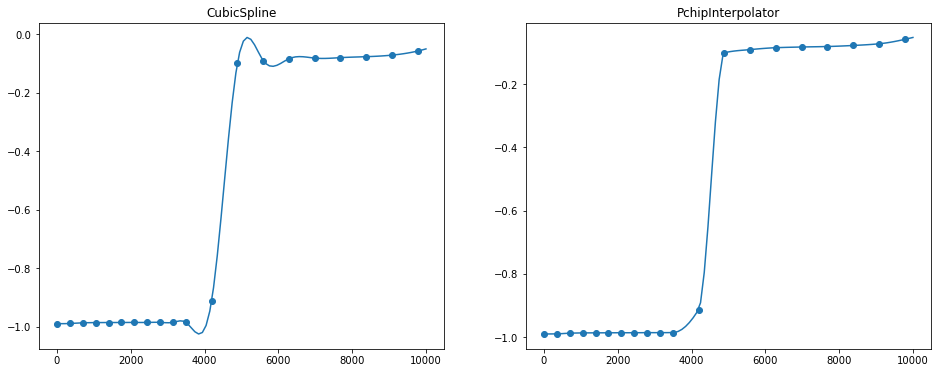

In [60]:
plt.figure(figsize=(16, 6))
plt.tight_layout()
xx = np.linspace(0, 10**4, 100)

ax1 = plt.subplot(1, 2, 1)
ax1.scatter(x1, y1)
ax1.plot(xx, inter_cub(xx))
ax1.set_title('CubicSpline')

ax2 = plt.subplot(1, 2, 2)
ax2.set_title('PchipInterpolator')
ax2.scatter(x1, y1)
ax2.plot(xx, inter_pchip(xx))


plt.show()

Это уже гораздо лучше

# Task2

In [115]:
def graph_max(n=16): #без plt.ylim
    x = np.linspace(-1, 1, n)
    y = np.cos(n*x)

    coeff = np.polyfit(x, y, n)

    plt.figure(figsize=(16, 6))
    plt.tight_layout()
    xx = np.linspace(-1,1, 100)

    plt.subplot(1, 2, 1)
    plt.scatter(x, y)
    plt.plot(xx, np.polyval(coeff, xx))
    plt.title('np.polyfit, n = ' + str(n))
    
    plt.subplot(1, 2, 2)
    plt.title('lagrange, n = ' + str(n))
    plt.scatter(x, y)
    plt.plot(xx, lagrange(xx, x, y))
    
    plt.show()

In [111]:
def graph(n=16): #c plt.ylim
    x = np.linspace(-1, 1, n)
    y = np.cos(n*x)

    coeff = np.polyfit(x, y, n)

    plt.figure(figsize=(16, 6))
    plt.tight_layout()
    xx = np.linspace(-1,1, 100)

    plt.subplot(1, 2, 1)
    plt.scatter(x, y)
    plt.plot(xx, np.polyval(coeff, xx))
    plt.title('np.polyfit, n = ' + str(n))
    plt.ylim(-1,1)
    
    plt.subplot(1, 2, 2)
    plt.title('lagrange, n = ' + str(n))
    plt.scatter(x, y)
    plt.plot(xx, lagrange(xx, x, y))
    plt.ylim(-1,1)
    
    plt.show()

<ipython-input-112-31da0728b056>:3: RankWarning: Polyfit may be poorly conditioned
  graph(i)


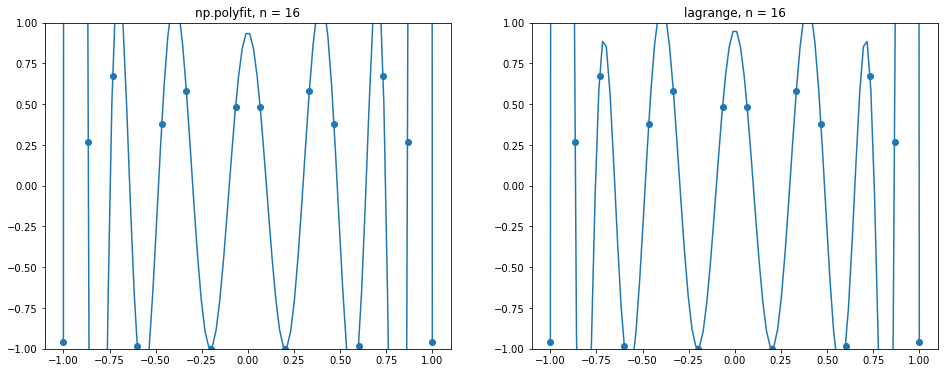

<ipython-input-112-31da0728b056>:3: RankWarning: Polyfit may be poorly conditioned
  graph(i)


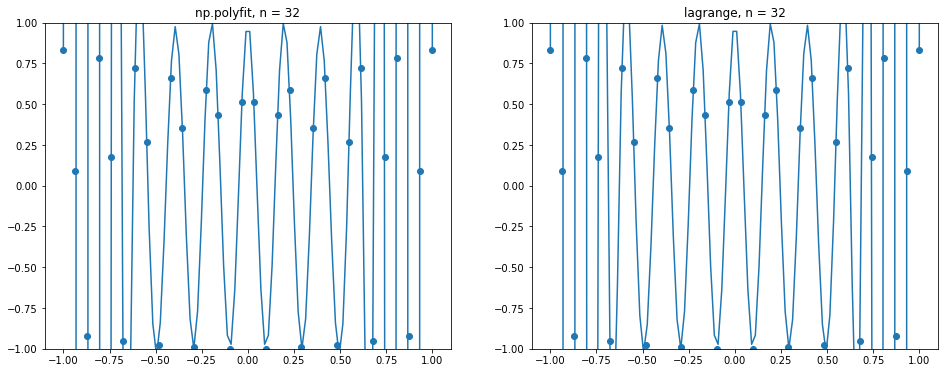

<ipython-input-112-31da0728b056>:3: RankWarning: Polyfit may be poorly conditioned
  graph(i)


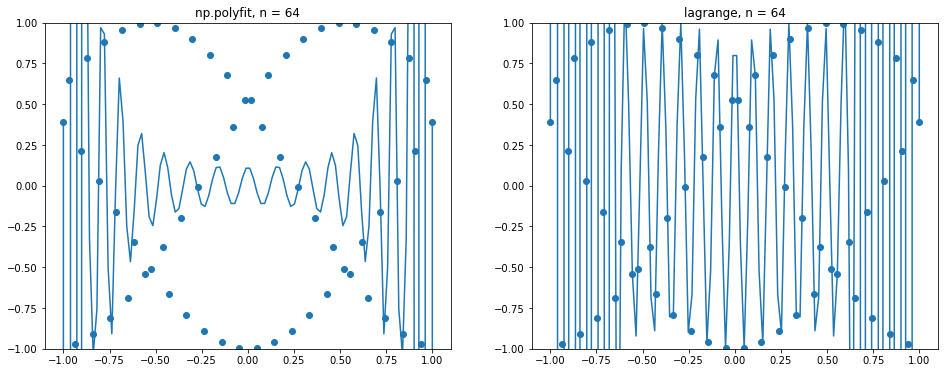

In [112]:
n = [16, 32, 64]
for i in n:
    graph(i)

<ipython-input-116-a6172d8da001>:2: RankWarning: Polyfit may be poorly conditioned
  graph_max(i)


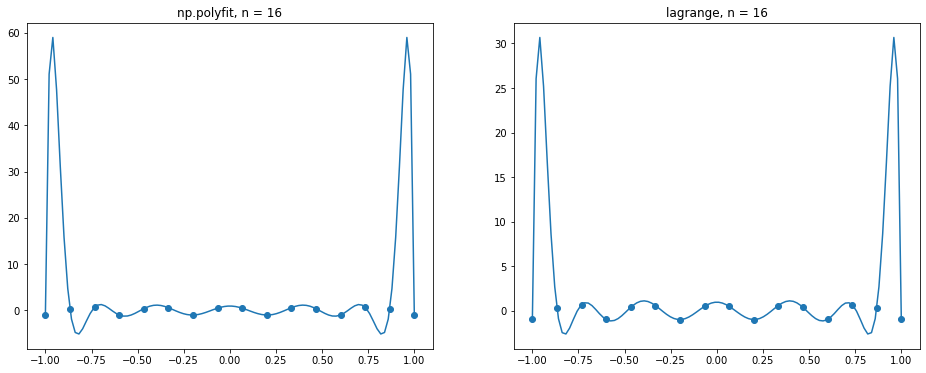

<ipython-input-116-a6172d8da001>:2: RankWarning: Polyfit may be poorly conditioned
  graph_max(i)


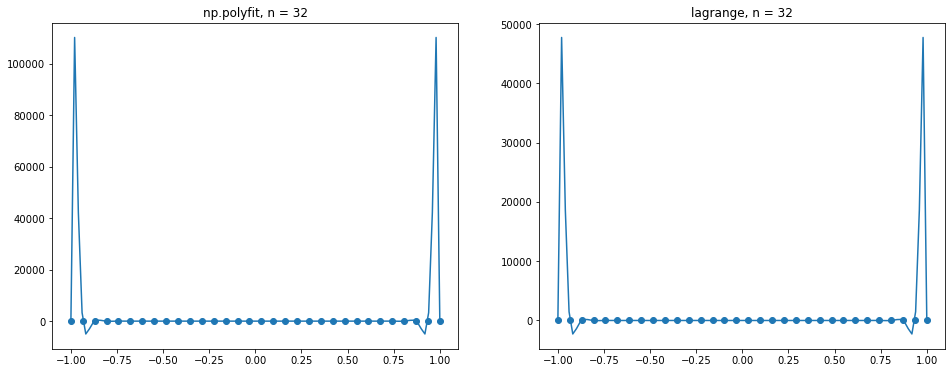

<ipython-input-116-a6172d8da001>:2: RankWarning: Polyfit may be poorly conditioned
  graph_max(i)


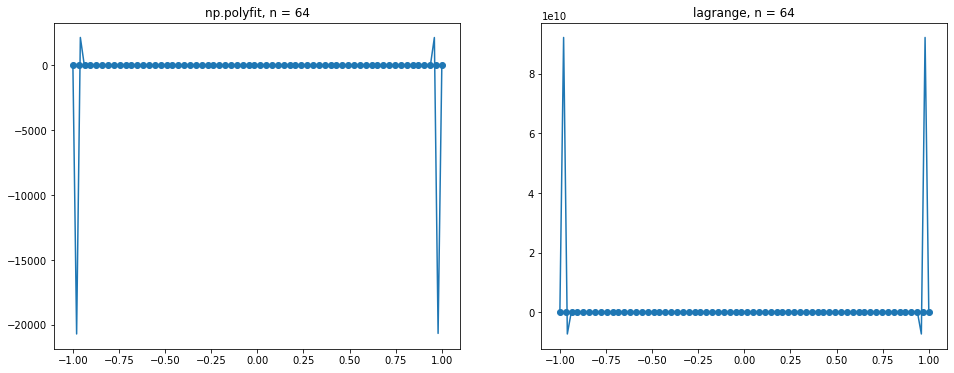

In [116]:
for i in n:
    graph_max(i)

Видно, что при малых n оба способа почти не различимы. Однако, при больших n разница большая. Многочлен Лагранжа по построению всегда будет проходить через все точки, а np.polyfit пытается минимизировать квадратичную ошибку. Минимизирование такой ошибки при больших n достаточно не точное занятие (к тому же метод может найти локальный минимум, а не глобальный), и скорее всего в методе polifit стоят свои ограничения на величину коэффициентов, поэтому и появляются такие различия.

# Task3

In [197]:
n = 15
x = np.linspace(-1, 1, n)
xx = np.linspace(-1, 1, 100)
y1 = lambda x: np.sin(6*x) + np.sin(60 * np.exp(x))
y2 = lambda x: 1/(1 + 1000*(x+0.5)**2) + 1/((1 + 1000*(x-0.5)**2))**0.5

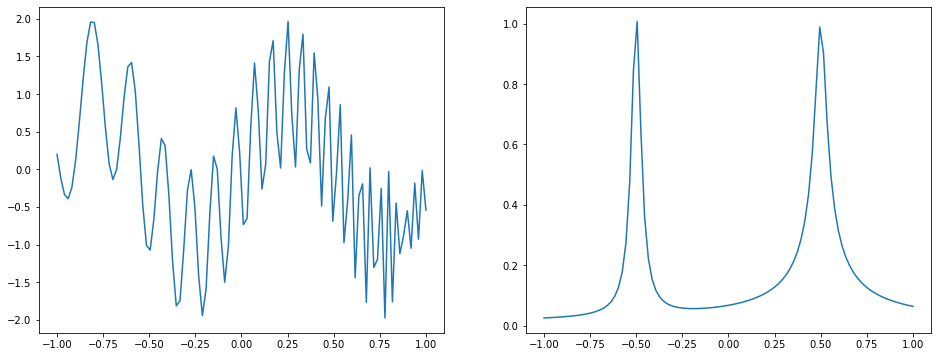

In [199]:
plt.figure(figsize=(16, 6))
plt.tight_layout()

plt.subplot(1, 2, 1)
plt.plot(xx, y1(xx))

plt.subplot(1, 2, 2)
plt.plot(xx, y2(xx))

plt.show()

Функции уже в интервале от -1 до 1, это приятно 

Найдем узлы Чебышёва 

In [188]:
xc = np.array([np.cos(j*np.pi/n) for j in range(n+1)])

In [189]:
pol1 = np.polynomial.chebyshev.Chebyshev.fit(xc, y1(xc), n)
pol1

Chebyshev([-0.33646326, -0.5119883 ,  0.17289618, -0.06935133,  0.04011302,
        0.88538536, -0.15709845, -0.23926131,  0.10650415, -0.084693  ,
        0.59222888, -0.17134294, -0.21875632, -0.1266898 , -0.37158072,
       -0.05210341], domain=[-1.,  1.], window=[-1.,  1.])

In [190]:
pol2 = np.polynomial.chebyshev.Chebyshev.fit(xc, y2(xc), n)
pol2

Chebyshev([ 0.2018614 ,  0.03452539, -0.1500567 , -0.0147766 , -0.14291922,
       -0.00248602,  0.25903376, -0.00579031, -0.12133887,  0.01880674,
       -0.11949441, -0.0114141 ,  0.23141098, -0.01220347, -0.11418449,
        0.0125896 ], domain=[-1.,  1.], window=[-1.,  1.])

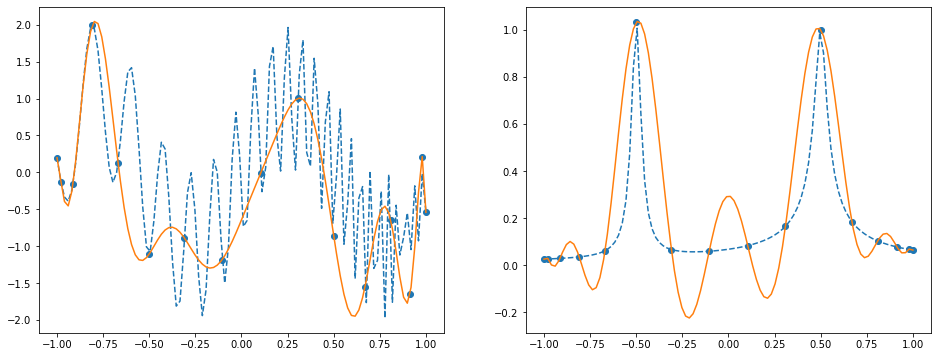

In [192]:
plt.figure(figsize=(16, 6))
plt.tight_layout()

plt.subplot(1, 2, 1)
plt.scatter(xc, y1(xc))
plt.plot(xx, y1(xx), label='True function', linestyle='dashed')
plt.plot(xx, pol1(xx), label='Chebyshev')

plt.subplot(1, 2, 2)
plt.scatter(xc, y2(xc))
plt.plot(xx, y2(xx), label='True function', linestyle='dashed')
plt.plot(xx, pol2(xx), label='Chebyshev')

plt.show()

Теперь будем менять кзначение n

In [195]:
def graph(n=15):
    xc = np.array([np.cos(j*np.pi/n) for j in range(n+1)])
    plt.figure(figsize=(16, 6))
    plt.tight_layout()
    xx = np.linspace(-1, 1, 100)
    
    pol1 = np.polynomial.chebyshev.Chebyshev.fit(xc, y1(xc), n)
    pol2 = np.polynomial.chebyshev.Chebyshev.fit(xc, y2(xc), n)
    
    plt.subplot(1, 2, 1)
    plt.scatter(xc, y1(xc))
    plt.plot(xx, y1(xx), label='True function', linestyle='dashed')
    plt.plot(xx, pol1(xx), label='Chebyshev')
    plt.title('Количество узлов = ' + str(n))
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(xc, y2(xc))
    plt.plot(xx, y2(xx), label='True function', linestyle='dashed')
    plt.plot(xx, pol2(xx), label='Chebyshev')
    plt.title('Количество узлов = ' + str(n))
    plt.legend()

    plt.show()

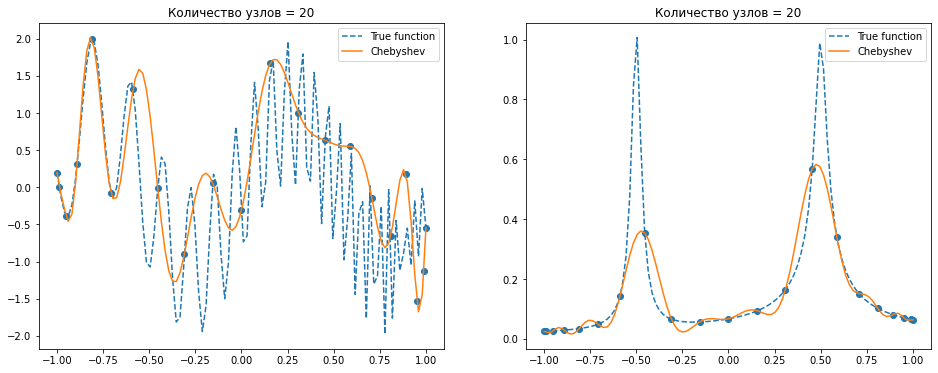

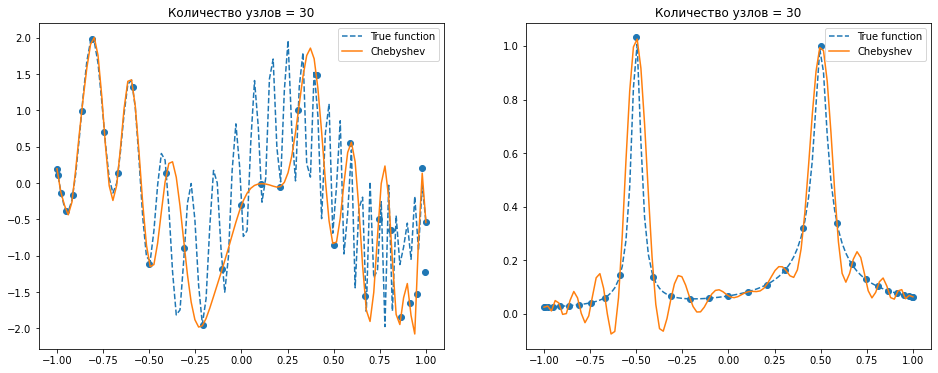

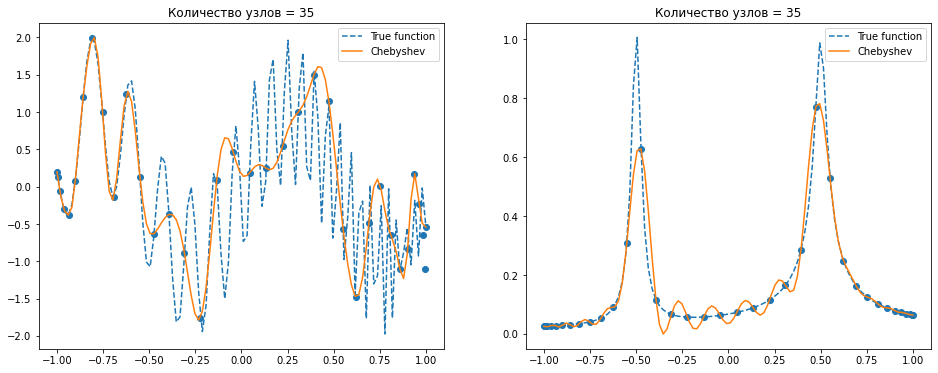

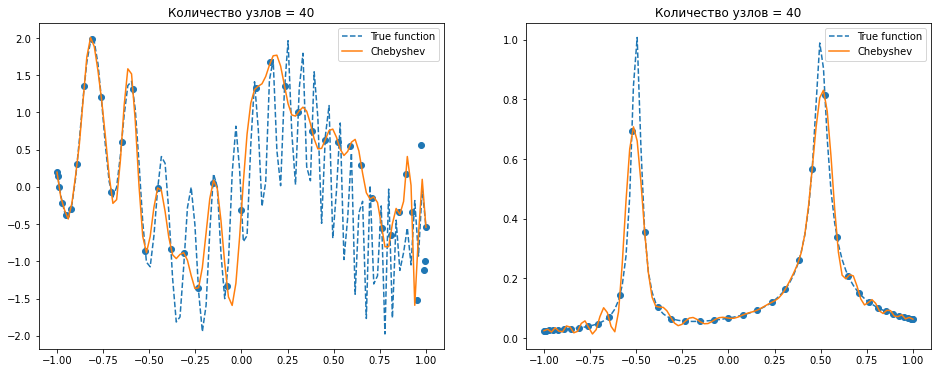

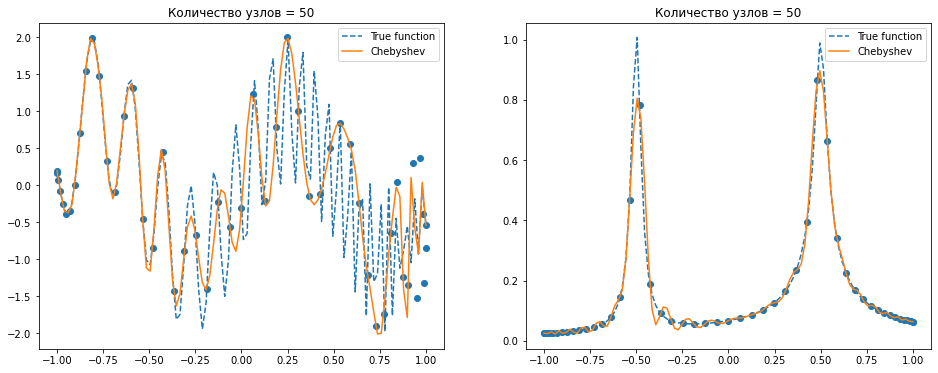

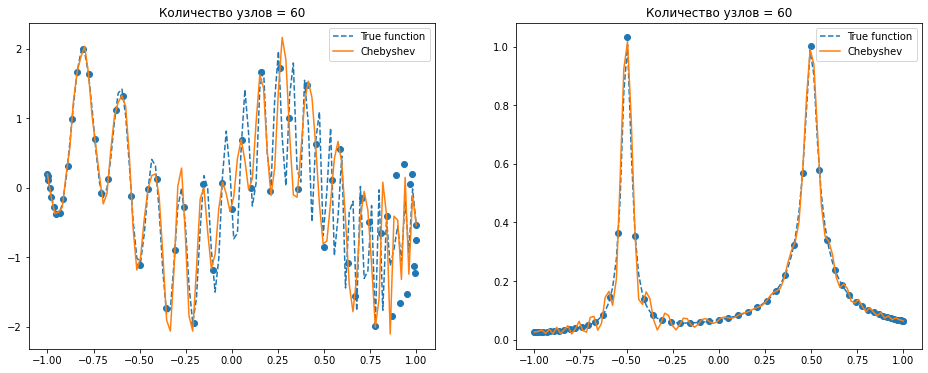

In [196]:
n = np.array([20, 30, 35, 40, 50, 60])
for i in n:
    graph(i)

Заметно, что вторая функция гораздо лучше интерполируется полиномами Чебышеава. Приятные результаты получаются уже при 30 узлах, и дальше улучшается. Первая функция, очень плохо интерполируется, и какие то нормальные результаты можно получить только при n > 60.